Dataset : https://www.kaggle.com/datasets/meruvulikith/190k-spam-ham-email-dataset-for-classification

In [1]:
!pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download meruvulikith/190k-spam-ham-email-dataset-for-classification

 96% 103M/107M [00:03<00:00, 45.4MB/s] 
100% 107M/107M [00:03<00:00, 34.2MB/s]


In [6]:
! unzip /content/190k-spam-ham-email-dataset-for-classification.zip

Archive:  /content/190k-spam-ham-email-dataset-for-classification.zip
  inflating: spam_Emails_data.csv    


In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [8]:
df = pd.read_csv("/content/spam_Emails_data.csv")

In [9]:
df.head(10)

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...
5,Spam,img src escapenumberd http loan co kr img emai...
6,Ham,attached is the weekly deal report from 10 / 1...
7,Ham,this is the version that we created earlier th...
8,Ham,pulp writing printing paper escapenumber escap...
9,Ham,stefan metze metzmacher writes stefan metze m...


In [10]:
df['label'].value_counts()

label
Ham     102160
Spam     91692
Name: count, dtype: int64

In [11]:
df.isna().sum()

label    0
text     2
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
len(df)

193850

In [14]:
X = df['text'].to_numpy()
y = df['label']

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)

In [16]:
X[0]

"viiiiiiagraaaa\nonly for the ones that want to make her scream .\nprodigy scrawny crow define upgrade spongy balboa dither moiseyev schumann variegate ponce bernie cox angeles impassive circulate impend miscellany chalkboard whizzing pend armenian cutlet waring makeshift fletch dispel crest cadet dovetail rapprochement gerry bayreuth selectman wilmington tuttle alchemy itt bullyboy .\ncaan ' t do . . .\n"

In [17]:
y[0]

1

In [18]:
X[1]

'got ice thought look az original message ice operations mailto iceoperations intcx com sent friday october escapenumber escapenumber escapenumber escapenumber pm subject escapelong amended participant agreement dear participant receiving email identified company user administrator legal counsel signatory escapelong participant agreement serves notice intercontinentals intent amend agreement effective december escapenumber escapenumber relevant documentation attached includes contact information questions thank escapelong inc'

In [19]:
y[1]

0

In [20]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_nb = Pipeline([
    ('Vectorizer', TfidfVectorizer()),
    ('ML Model', MultinomialNB())
])

model_nb.fit(X_train, y_train)

Pipeline(steps=[('Vectorizer', TfidfVectorizer()),
                ('ML Model', MultinomialNB())])

In [23]:
model_nb.score(X_test, y_test)

0.9617229816868713

In [24]:
df['text'].apply(len).mean()

1812.7794273923137

In [25]:
MAX_VOCAB = 10000
MAX_LENGTH = 1800

In [26]:
text_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=MAX_VOCAB,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=None,
    output_mode='int',
    output_sequence_length=MAX_LENGTH,
    pad_to_max_tokens=True,
)

In [27]:
text_vectorizer.adapt(X_train)

In [28]:
vocab = text_vectorizer.get_vocabulary()

In [29]:
vocab[:15]

['',
 '[UNK]',
 'escapenumber',
 'the',
 'to',
 'and',
 'of',
 'a',
 'escapelong',
 'in',
 'for',
 'is',
 'you',
 'i',
 'com']

In [30]:
embedding_layer = tf.keras.layers.Embedding(
    input_dim=MAX_VOCAB,
    output_dim=64,
    input_length=MAX_LENGTH
)

In [31]:
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding_layer(x)

x = tf.keras.layers.LSTM(units=128, return_sequences=True)(x)
x = tf.keras.layers.GlobalMaxPooling1D()(x)
x = tf.keras.layers.Dense(units=64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(x)

model_lstm = tf.keras.Model(inputs, outputs)

In [32]:
model_lstm.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=['accuracy'])

In [33]:
model_lstm.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
4241/4241 [==============================] - 656s 153ms/step - loss: 0.0859 - accuracy: 0.9694 - val_loss: 0.0495 - val_accuracy: 0.9833
Epoch 2/5
4241/4241 [==============================] - 404s 95ms/step - loss: 0.0355 - accuracy: 0.9885 - val_loss: 0.0396 - val_accuracy: 0.9872
Epoch 3/5
4241/4241 [==============================] - 384s 91ms/step - loss: 0.0218 - accuracy: 0.9933 - val_loss: 0.0365 - val_accuracy: 0.9885
Epoch 4/5
4241/4241 [==============================] - 376s 89ms/step - loss: 0.0139 - accuracy: 0.9956 - val_loss: 0.0479 - val_accuracy: 0.9862
Epoch 5/5
4241/4241 [==============================] - 372s 88ms/step - loss: 0.0097 - accuracy: 0.9971 - val_loss: 0.0414 - val_accuracy: 0.9893


In [34]:
model_lstm.evaluate(X_test, y_test)

1818/1818 [==============================] - 55s 30ms/step - loss: 0.0414 - accuracy: 0.9893


[0.04140106961131096, 0.9893216490745544]

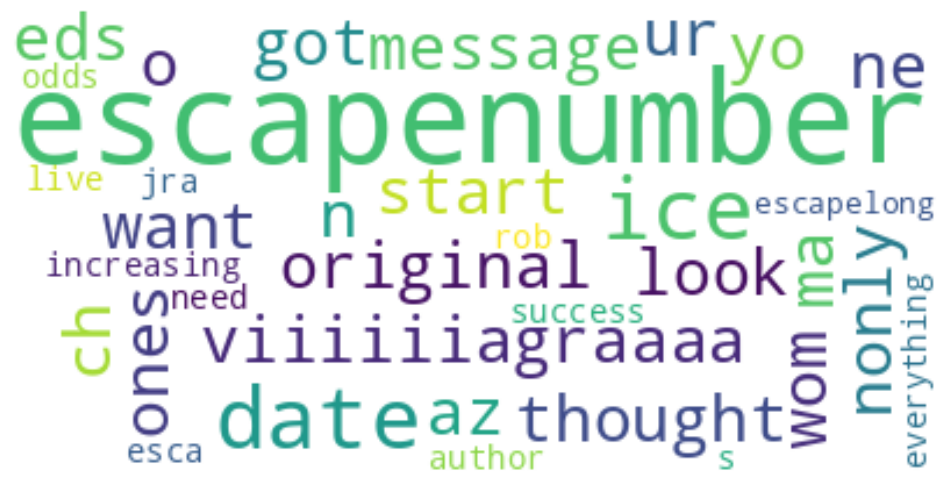

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=150, max_words=35, background_color="white")

wordcloud.generate(str(df['text']))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()